<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           4250 non-null   int64  
 1   number          4250 non-null   int64  
 2   title           4250 non-null   object 
 3   classification  4250 non-null   object 
 4   timestamp       4250 non-null   object 
 5   latitude        4250 non-null   float64
 6   longitude       4250 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 232.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5021 entries, 0 to 5020
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               5021 non-null   int64  
 1   observed            4983 non-null   object 
 2   location_details    4260 non-null   object 
 3   county              5021 non-null   object 
 4   state              

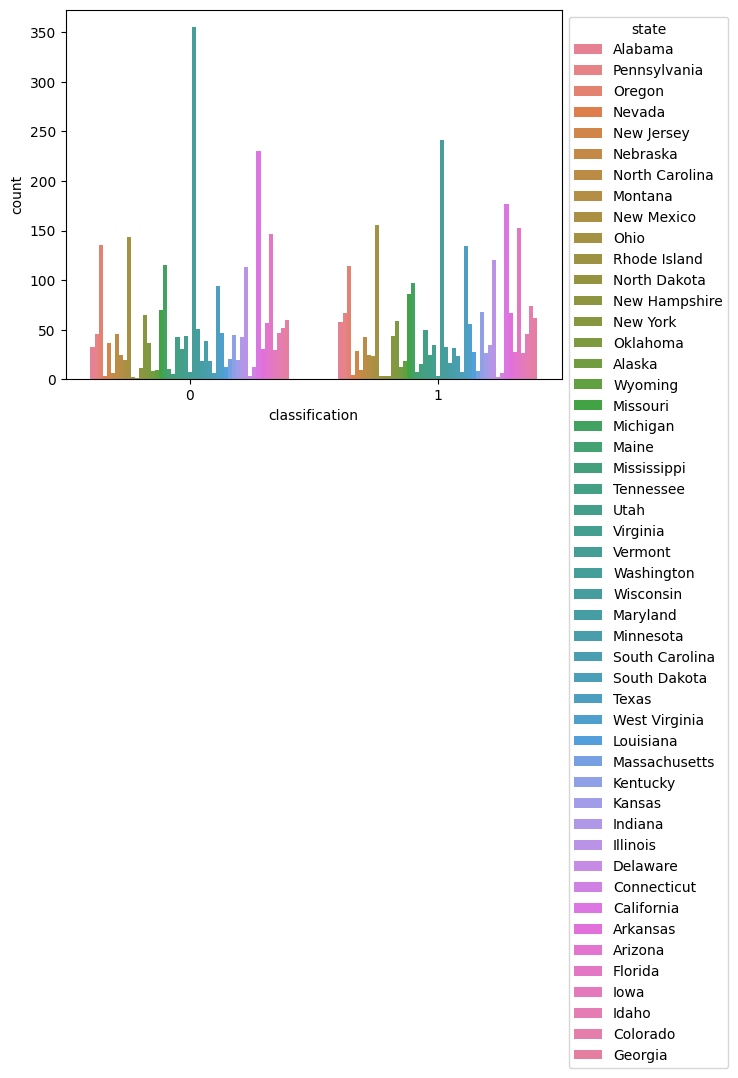

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

In [1]:
%run EDA.ipynb
%run modeling.ipynb

In [2]:
df

,YEAR,NEAREST_TOWN,NEAREST_ROAD,OBSERVED,ALSO_NOTICED,OTHER_WITNESSES,OTHER_STORIES,TIME_AND_CONDITIONS,ENVIRONMENT,REPORT_NUMBER,location_details,county,state,season,title,latitude,longitude,number,classification,geohash,temperature_high,temperature_mid,temperature_low,dew_point,humidity,cloud_cover,moon_phase,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,preprocessed_text
0,2010,Double Springs,Highway 33,I was canoeing on the Sipsey river in Alabama....,3 hours before on river while I paused to fix ...,none,"No, but I've had a couple of weird things happ...","Dusk, was a clear day in about the high 80s te...",River running through a very remote forest are...,30680.0,NaN,Winston County,Alabama,Summer,NaN,NaN,NaN,30680.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['canning', 'tipsy', 'river', 'alabama', 'dusk..."
1,1990,NaN,NaN,Ed L. was salmon fishing with a companion in P...,NaN,On a commercial fishing boat at anchor at the ...,NaN,"Early Fall, in the early 1990's.",NaN,1261.0,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,1261.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['salmon', 'fishing', 'companion', 'prince', '..."
2,1974,Wakefield,Perry Ave.,"While attending U.R.I in the Fall of 1974,I wo...",none,none,"White gorilla was seen in a gravel pit, by a f...","10:00pm, very dark cool night.","Typical new England. Oak,Pine and Maple trees....",6496.0,"Great swamp area, Narragansett Indians",Washington County,Rhode Island,Fall,Report 6496: Bicycling student has night encou...,41.45,-71.5,6496.0,1,drm5ucxrc0,78.17,73.425,68.68,65.72,0.86,0.86,0.16,0.0,0.0,NaN,1020.61,Foggy until afternoon.,4.0,2.75,198.0,6.92,"['attending', 'would', 'stay', 'girlfriend', '..."
3,1972,York; more specifically Manchester twp.,Raintree Road,"Hello, My name is Doug and though I am very re...",My friend noted that he had spent the night be...,3. Don't remember the name of the third. He wa...,Just noting that my friend spent the night bef...,Incident occured somewhere between the hours o...,NaN,8000.0,I would rather not have exact location (listin...,York County,Pennsylvania,Summer,NaN,NaN,NaN,8000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['hello', 'name', 'though', 'reluctant', 'post..."
4,1984,Yamhill,NW Fairdale,It was May 1984. Two friends and I were up in ...,Not sure. It took me a full 5 years to be able...,There were two other wittness' other than me. ...,NaN,I know that it was May of 1984 because it was ...,Gravel logging road. Very dense fir forests. B...,703.0,"Logging roads north west of Yamhill, OR, about...",Yamhill County,Oregon,Spring,NaN,NaN,NaN,703.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['may', 'two', 'friend', 'hill', 'yamhill', 'l..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4947,2005,dulce nm,(withheld),while camping protecting other equipment befor...,no frist time camping there,"one nephew, my two son where sleeping",local people talk off seeing bigfoot in the ar...,"moon was half full, about 0330 hrs. clear skys...","mountain valley, with ridges and canyons, pine...",11992.0,(withheld),Rio Arriba County,New Mexico,Summer,NaN,NaN,NaN,11992.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['camping', 'protecting', 'equipment', 'feat',..."
4948,1976,NaN,NaN,I was on my way to work on a Saturday morning ...,NaN,I was on my way to work around 7 am on a Satur...,NaN,NaN,there is an undeveloped area of land that stra...,1171.0,"Laurel, Maryland. It was sighted off of Rt 19...",Prince George's County,Maryland,Spring,NaN,NaN,NaN,1171.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['way', 'work', 'saturday', 'morning', 'misty'..."
4949,2011,Sorrento,Mt.Ply

## Naive Bayes classifier - Multinomial

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics

In [4]:
X = df['OBSERVED']
y = df['classification']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=88)

### Using Count Vectorizer

In [6]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)

In [7]:
count_vectorizer.get_feature_names_out()[:20]

array(['00', '000', '0000', '0035hrs', '00a', '00am', '00buck', '00ish',
       '00p', '00pm', '01', '0100', '0102', '01192008', '0130', '0138',
       '02', '0200', '0230', '0230hrs'], dtype=object)

In [8]:
count_train.A

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
#instantiating the classifier 
nb_classifier = MultinomialNB()

In [10]:
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [11]:
#using the trained model to predict the classification
pred = nb_classifier.predict(count_test)

In [12]:
metrics.accuracy_score(y_test, pred)

0.8174474959612278

about 82% accuracy 

In [13]:
metrics.confusion_matrix(y_test, pred, labels=[0,1])

array([[482, 146],
       [ 80, 530]])

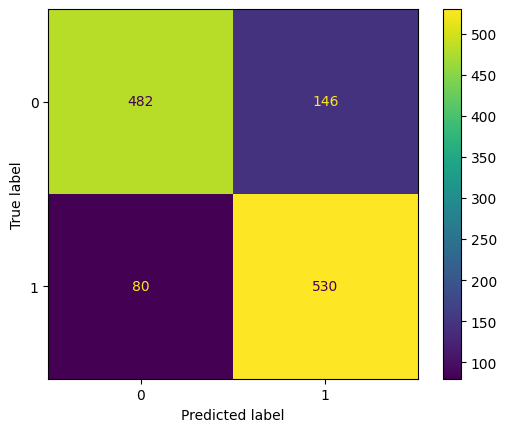

In [14]:
ConfusionMatrixDisplay.from_estimator(nb_classifier, count_test, y_test);

### Using TF-IDF Vectorizer

In [15]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)
tfidf_test = tfidf_vectorizer.transform(X_test.values)

In [16]:
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB()

In [17]:
pred = nb_classifier.predict(tfidf_test)
metrics.accuracy_score(y_test, pred)

0.8150242326332795

In [18]:
metrics.confusion_matrix(y_test, pred, labels=[0, 1])

array([[488, 140],
       [ 89, 521]])

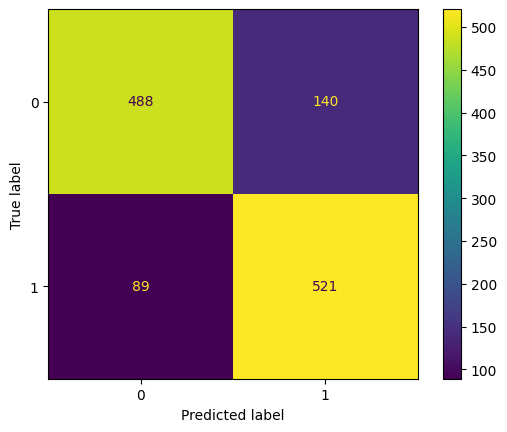

In [19]:
ConfusionMatrixDisplay.from_estimator(nb_classifier, tfidf_test, y_test);

In [20]:
class_labels = nb_classifier.classes_

In [21]:
feature_names = tfidf_vectorizer.get_feature_names_out

In [22]:
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

AttributeError: 'MultinomialNB' object has no attribute 'coef_'

In [23]:
# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

NameError: name 'feat_with_weights' is not defined

## Decision Tree Classifier

In [24]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=88)
tree_clf.fit(count_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=88)

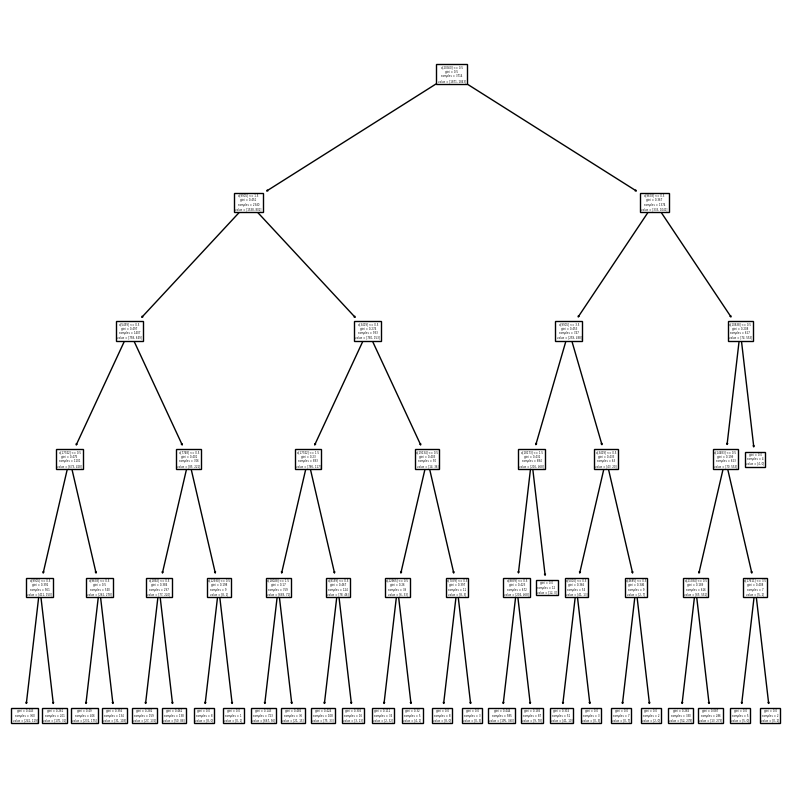

In [25]:
#plotting the decision tree
f, ax =  plt.subplots(figsize=(10,10))
plot_tree(tree_clf, ax=ax);

In [26]:
pred = tree_clf.predict(count_test)
metrics.accuracy_score(y_test, pred)

0.7415185783521809

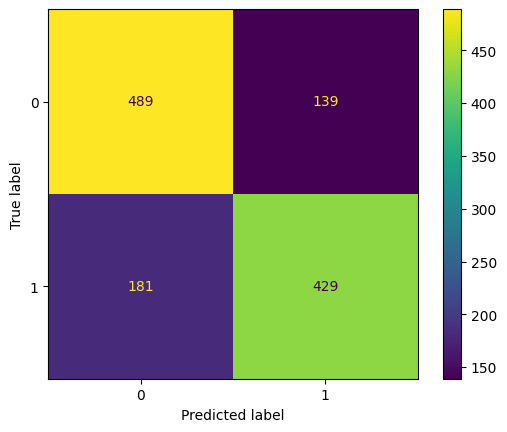

In [27]:
ConfusionMatrixDisplay.from_estimator(tree_clf, count_test, y_test);

Not as good of a model as NB Classifier with an accuracy of 74%.

Even changing the parameters, the accuracy score did not fluctuate much. 

## Pipeline/GridSearch

In [28]:
from sklearn.model_selection import GridSearchCV